<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 2: Machine Learning for Malware Analysis (2022)
---

The completion of this worksheet is worth a **maximum of 35 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

In this task, you have been given a large sample of derived malware features that describe 14 different malware variants (2000 samples of each). The purpose of this task is to understand the underlying concepts of classification, and **your task will be to develop two classifiers that can classify malware varients**. The first part will focus on a small hand-made classifier using only 3 malware classes, to understand the principles of search space and minimisation of a function. The second part will focus on using off-the-shelf libraries to scale up the classification to all 14 classes of malware present in the dataset.

### Assessment and Marking
---

For each question you will see the maximum number of marks you may be awarded for a complete answer in brackets.

**Part 1: Developing a Classifier "by hand"**

* **Task 1:** Find the Centroid point of each of the three groups (3)
* **Task 2:** Plot the centroids on a Scatter Plot against the train data colour-coded by group (3)
* **Task 3:** For each item in test_data, measure the distance to each centroid point, assign membership to the group of minimum distance, and compare with the expected test data label to obtain a score of successful classifications (12)
* **Task 4:** Provide a final accuracy score for the performance of your "by hand" classifier (2)

**Part 2: Developing a large-scale ML classifier**

* **Task 5:** Scale the Input Features for further processing using the StandardScaler function (1)
* **Task 6:** Obtain numerical labels for each class using the LabelEncoder function (1)
* **(Advanced) Task 7:** Prepare the dataset for ML testing, using the Train-Test-Split function of sklearn (2)
* **(Advanced) Task 8:** Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)
* **(Advanced) Task 9:** Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)
* **(Advanced) Task 10:** Show how ML parameters can improve the models to achieve a high accuracy score of over 80% (3)

Your submission should be submitted to GitLab so that the notebook is fully rendered and executed.
 
### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
features = pd.read_csv('./T2_data/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [3]:
labels = pd.read_csv('./T2_data/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels

,label
0,high
1,high
2,high
3,high
4,high
...,...
27995,zbot
27996,zbot
27997,zbot
27998,zbot


## Part 1: Developing a Classifier "by hand"

In [7]:

# DO NOT MODIFY THIS CELL
mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data.value_counts('labels')
test_data.value_counts('labels')

test_data



,x,y,labels
0,1478119.0,10575.0,wannacry
1,53767.0,21413.0,wannacry
2,4085568.0,6635.0,wannacry
3,2647584.0,19566.0,wannacry
4,4470838.0,5131.0,wannacry
...,...,...,...
85,69418.0,9673.0,razy
86,8060.0,1580.0,razy
87,4394.0,540.0,razy
88,183380.0,8477.0,razy


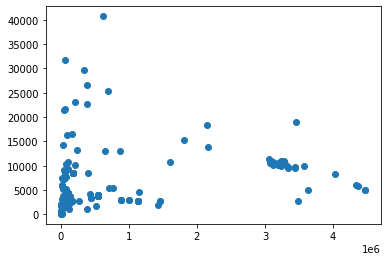

In [8]:
plt.scatter(train_data['x'], train_data['y'])

### Task 1: Find the Centroid point of each of the three groups (3)

In [9]:
# ANSWER
# K is the number of cliusters
k = 3

# I created seperate dataframes for each label, this allowed me to easily calculate the centroid 
train_wannacry = train_data[train_data['labels'] == 'wannacry']
train_razy = train_data[train_data['labels'] == 'razy']
train_startsurf = train_data[train_data['labels'] == 'startsurf']

# I calculated the centroid for each label and stored them in a numpy array
# I do this by finding the mean of the x and y values for each label
centroids = []
centroids.append([train_wannacry['x'].mean(), train_wannacry['y'].mean()])
centroids.append([train_razy['x'].mean(), train_razy['y'].mean()])
centroids.append([train_startsurf['x'].mean(), train_startsurf['y'].mean()])
centroids = np.array(centroids)


# I created a function to generate random centroids between the values 5*10^6 and 45000
def generate_initial_points(k):
    centroids = []
    for i in range(k):
        c = [np.random.randint(1, 5 * pow(10, 6)), np.random.randint(1, 45000)]
        centroids.append(c)
    centroids = np.array(centroids)
    return centroids

# centroids = generate_initial_points(k)
print(centroids)



[[2181660.66   11087.1 ]
 [ 100505.22    6158.28]
 [ 478778.12    3754.04]]


Initially I only used random centriods for the by hand classifier but by doing this the accuracy was not ideal as there is a cluster of points close (0,0) which has labels from 2 different groups. 

After having a discussion with Thomas I decided that I would determine the positions of the centroids from the data rather than them being random.

By finding the mean of each group and creating centroids off of that it means that when I go to update the centroids it finds a better cluster in the long run and improves the overall accuracy.

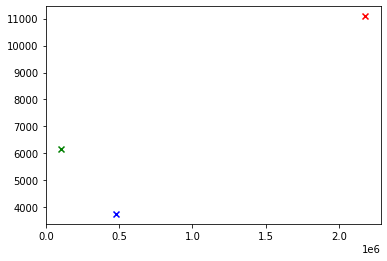

In [10]:
# Plottong the centroids on the graph
plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

After creating the centroids I then create 3 lists to contain the clusters 

I created the function assign_clusters to assign each point of data to one of the clusters. This will be used for when I plot the clusters on the graph. The data points are assigned to each cluster by the shortest distance from the centroid.

I then update the centroids by finding the mean position between its point and all of the other data points around it.

Once the centroids have been updated I then update the clusters to reflect this as some of the data points may be closer to a different centroid due to the centroids possibly changing positions.

In [11]:
from sklearn import cluster


cluster1 = []
cluster2 = []
cluster3 = []

all_data = train_data[['x', 'y']]

def assign_clusters(centroids, all_data):
    cluster1 = []
    cluster2 = []
    cluster3 = []
    for i in range(all_data.shape[0]):
        distance1 = np.sqrt(np.abs(all_data.iloc[i, 0] - centroids[0,0]) ** 2 + np.abs(all_data.iloc[i, 1] - centroids[0,1]) ** 2)
        distance2 = np.sqrt(np.abs(all_data.iloc[i, 0] - centroids[1,0]) ** 2 + np.abs(all_data.iloc[i, 1] - centroids[1,1]) ** 2)
        distance3 = np.sqrt(np.abs(all_data.iloc[i, 0] - centroids[2,0]) ** 2 + np.abs(all_data.iloc[i, 1] - centroids[2,1]) ** 2)
        distances = [distance1, distance2, distance3]
        if np.argmin(distances) == 0:
            cluster1.append([all_data.iloc[i, 0], all_data.iloc[i, 1]])
        elif np.argmin(distances) == 1:
            cluster2.append([all_data.iloc[i, 0], all_data.iloc[i, 1]])
        elif np.argmin(distances) == 2:
            cluster3.append([all_data.iloc[i, 0], all_data.iloc[i, 1]])
    cluster1 = np.array(cluster1)
    cluster2 = np.array(cluster2)
    cluster3 = np.array(cluster3)
    return cluster1, cluster2, cluster3

cluster1, cluster2, cluster3 = assign_clusters(centroids, all_data)


# Update centroids
centroids = np.array([np.mean(cluster1, axis=0), np.mean(cluster2, axis=0), np.mean(cluster3, axis=0)])

# Update clusters

all_data = np.vstack([cluster1, cluster2, cluster3])
all_data = pd.DataFrame(all_data)
cluster1, cluster2, cluster3 = assign_clusters(centroids, all_data)



### Task 2: Plot the centroids on a Scatter Plot against the train data colour-coded by group (3)

I then plot the data points on the same graph as the centroids

The centroids are plotted as X's
The data points are plotted as dots 

The data is then coloured coded depending on the centroid that it grouped to.

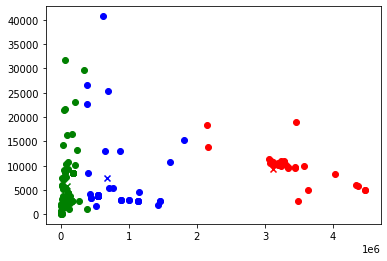

In [12]:
# ANSWER
plt.scatter(cluster1[:,0], cluster1[:,1], color='r')
plt.scatter(cluster2[:,0], cluster2[:,1], color='g')
plt.scatter(cluster3[:,0], cluster3[:,1], color='b')

plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

plt.show()

### Task 3: For each item in test_data, measure the distance to each centroid point, assign membership to the group of minimum distance, and compare with the expected test data label to obtain a score of successful classifications (12)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task*

In [13]:
# ANSWER
# I copied the test data to avoid altering the base data
test_data = test_data.copy()

# I then assign the test data to three new clusters depening on the centroids that have previously been created
test_cluster1, test_cluster2, test_cluster3 = assign_clusters(centroids, test_data[['x', 'y']])



In [13]:
# I created 3 new arrays to store the labels for each cluster
test_cluster1_labels = []
test_cluster2_labels = []
test_cluster3_labels = []

# I then loop through each cluster and append the label for each data point into the corresponding new array
for i in test_cluster1:

    label = test_data[(test_data['x'] == i[0]) & (test_data['y'] == i[1])]['labels'].values[0]
    test_cluster1_labels.append(label)

for i in test_cluster2:

    label = test_data[(test_data['x'] == i[0]) & (test_data['y'] == i[1])]['labels'].values[0]
    test_cluster2_labels.append(label)

for i in test_cluster3:

    label = test_data[(test_data['x'] == i[0]) & (test_data['y'] == i[1])]['labels'].values[0]
    test_cluster3_labels.append(label)

# I then convert the arrays into dataframes 
test_cluster1_labels = pd.DataFrame(test_cluster1_labels, columns=['labels'])
test_cluster2_labels = pd.DataFrame(test_cluster2_labels, columns=['labels'])
test_cluster3_labels = pd.DataFrame(test_cluster3_labels, columns=['labels'])

# I then group each cluster by the different labels and count the number of each label for testing purposes
print(test_cluster1_labels.groupby('labels').size())
print()
print(test_cluster2_labels.groupby('labels').size())
print()
print(test_cluster3_labels.groupby('labels').size())


labels
wannacry    16
dtype: int64

labels
razy         30
startsurf    13
wannacry     10
dtype: int64

labels
startsurf    17
wannacry      4
dtype: int64


## Plotting the test data with the centroids

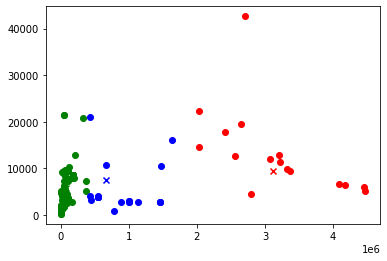

In [14]:

plt.scatter(test_cluster1[:,0], test_cluster1[:,1], color='r')
plt.scatter(test_cluster2[:,0], test_cluster2[:,1], color='g')
plt.scatter(test_cluster3[:,0], test_cluster3[:,1], color='b')


plt.scatter(centroids[0,0], centroids[0,1], marker='x', color='r')
plt.scatter(centroids[1,0], centroids[1,1], marker='x', color='g')
plt.scatter(centroids[2,0], centroids[2,1], marker='x', color='b')

### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier (2)

In [16]:
# ANSWER
# I work out the number of correct labels for each cluster by counting the occurences of each label in the 3 clusters
# and taking the highest value from each as the correct label

cluster1_correct = test_cluster1_labels['labels'].value_counts()[0]
cluster2_correct = test_cluster2_labels['labels'].value_counts()[0]
cluster3_correct = test_cluster3_labels['labels'].value_counts()[0]

# I then divide the sum of all of the correct labels by 90 (the amount of test data) to get the final accuracy
final_accuracy = (cluster1_correct + cluster2_correct + cluster3_correct) / len(test_data)
print(final_accuracy)

0.7


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification.

### Task 5: Scale the Input Features for further processing using the StandardScaler function (1)

In [4]:
# ANSWER
from sklearn.preprocessing import StandardScaler

# I created a copy of the features to avoid altering the base data
full_data = features.copy()

# I then created a new scaler object which I then use to scale the data
scaler = StandardScaler()
full_data = scaler.fit_transform(full_data)
full_data = pd.DataFrame(full_data)

full_data


,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.097820,0.672159,0.826630,0.380661,0.647650,0.204495,0.792002,0.691117,1.028243,0.432558,...,0.191715,0.044177,0.845365,-0.010620,0.038420,0.068183,1.190714,0.135741,0.178144,0.406173
1,-0.355085,-0.291567,-0.274569,-0.254820,-0.323318,-0.234858,-0.178266,-0.244002,-0.310024,-0.182924,...,-0.155188,-0.155994,-0.248598,-0.175093,-0.166129,-0.179846,-0.248456,-0.168900,-0.218099,-0.238666
2,-0.351784,0.379844,0.241558,0.279985,0.178160,0.423038,0.259812,0.314504,0.202153,1.361289,...,0.543863,0.536584,0.422895,0.475873,0.359192,0.384618,0.260011,0.210779,0.192024,-0.230729
3,-0.373671,-0.408634,-0.418818,-0.451310,-0.434547,-0.405185,-0.364900,-0.422724,-0.506936,-0.419373,...,-0.411219,-0.363332,-0.464176,-0.352293,-0.315456,-0.353466,-0.429556,-0.312311,-0.303149,-0.268583
4,-0.375965,-0.363170,-0.384699,-0.382059,-0.402040,-0.327008,-0.317989,-0.328030,-0.433797,-0.295563,...,-0.278888,-0.254445,-0.370648,-0.250806,-0.230890,-0.258994,-0.365838,-0.264363,-0.302941,-0.268201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,-0.352491,-0.336398,-0.325344,-0.181181,-0.350134,-0.310013,-0.325062,-0.313473,-0.423691,-0.299442,...,-0.268735,-0.255535,-0.338796,-0.231958,-0.176103,-0.132452,-0.330864,-0.255961,-0.264016,-0.243465
27996,-0.370966,-0.366824,-0.385103,-0.385023,-0.349013,-0.335946,-0.331268,-0.307131,-0.425046,-0.306423,...,-0.267889,-0.264414,-0.364133,-0.232280,-0.223518,-0.277794,-0.373201,-0.265666,-0.299393,-0.258211
27997,-0.350581,-0.379613,-0.382378,-0.165528,-0.353755,-0.320840,0.157763,-0.320967,-0.417336,-0.284857,...,-0.341500,-0.319559,-0.366449,-0.285923,-0.283654,-0.309548,-0.408175,-0.310138,-0.345414,-0.260450
27998,-0.345952,0.014028,-0.184426,0.140058,-0.240888,0.139788,-0.144634,0.122522,-0.272205,0.131877,...,-0.400050,-0.383582,-0.428705,-0.362280,-0.344223,-0.387274,-0.459574,-0.371125,-0.382252,-0.246461


### Task 6: Obtain numerical labels for each class using the LabelEncoder function (1)

I import the LabelEncoder from sklearn, I then create a label encoder object and use it to encode the labels into numerical form

In [5]:
# ANSWER
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_labels = labels.copy()
data_labels = le.fit_transform(data_labels)
data_labels = pd.DataFrame(data_labels)
data_labels = data_labels.rename(columns={0:'labels'})
data_labels


/Users/jacobmoran/miniforge3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,labels
0,7
1,7
2,7
3,7
4,7
...,...
27995,13
27996,13
27997,13
27998,13


### (Advanced) Task 7: Prepare the dataset for ML testing, using the Train-Test-Split function of sklearn (2)

I use the train_test_split function from sklearn to split the data and the labels into training and testing sets with their corresponding labels. The test size shows the proportion of data that will be allocated to the testing dataset. 0.2 would resemble 20% of the data. The random state provides the seed so that these results can be replicated 

In [6]:
# ANSWER
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(full_data, data_labels, test_size=0.2, random_state=1)


### (Advanced) Task 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

I created an MLP classifier with the variables hidden layer size and max iter. By changing these variables and using others as well will determine the accuracy of the MLP classifier. I then calculate the accuracy score by using the accuracy score function eith the labels from the data and the predictions made by the classifier.

In [7]:
# ANSWER
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=5000)
mlp.fit(train_x, train_y['labels'])
predictions = mlp.predict(test_x)
accuracy = accuracy_score(test_y['labels'], predictions)
print(accuracy)

0.7430357142857142


### (Advanced) Task 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. (4)

I created an Random forest classifier with the variables n_estimators and max depth and random state. By changing these variables and using others as well will determine the accuracy of the classifier. I then calculate the accuracy score by using the accuracy score function with labels from the data and the predictions made by the classifier.

In [18]:
# ANSWER
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=0)
rf.fit(train_x, train_y['labels'])
predictions = rf.predict(test_x)
accuracy = accuracy_score(test_y['labels'], predictions)
print(accuracy)

0.8819642857142858


### (Advanced) Task 10: Show how ML parameters can improve the models to achieve a high accuracy score of over 80% (3)

*Marks wil be awarded for how your tuning improves accuracy beyond 80%.*

I am going to use grid search to refine my classifiers to get the best result. I will put a range of variable values in and gridsearch will test the combinations to find the best result 

In [14]:
# ANSWER
from sklearn.model_selection import GridSearchCV
MLPclf = GridSearchCV(MLPClassifier(), {'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100), (100, 100, 100, 100, 100)], 'max_iter': [5000, 10000, 15000]}, cv=5)
MLPclf.fit(train_x, train_y['labels'])
print(MLPclf.best_params_)

RFclf = GridSearchCV(RandomForestClassifier(), {'n_estimators': [100, 200, 300], 'max_depth': [2, 3, 4]}, cv=5)
RFclf.fit(train_x, train_y['labels'])
print(RFclf.best_params_)

{'max_depth': 4, 'n_estimators': 200}


In [28]:
rf = RandomForestClassifier(n_estimators=200, max_depth=20)
rf.fit(train_x, train_y['labels'])
predictions = rf.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

mlp = MLPClassifier(hidden_layer_sizes=(400), max_iter=7000) 
mlp.fit(train_x, train_y['labels'])
predictions = mlp.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8798214285714285
0.8208928571428571


As you can see that both scores have now increased above 80%